# Age_Detection_Using_Computer_Vision

* Become one with the data (visualize, visualize, visualize...)
* Preprocess the data (prepare it for a model)
* Create a model (start with a baseline)
* Fit the model
* Evaluate the model
* Adjust different parameters and improve model (try to beat your baseline)
* Repeat until satisfied

## 1. Import the Data

In [ ]:
import zipfile
import pathlib
import os
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPool2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from imblearn.over_sampling import RandomOverSampler

In [ ]:
# Let's unzip the file
zip_ref = zipfile.ZipFile("/content/drive/MyDrive/split_dataset.zip","r")
zip_ref.extractall()
zip_ref.close()

FileNotFoundError: ignored

In [ ]:
# Walk through train directory and list number of files
for dirpath, dirnames, filenames in os.walk("train"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 94 directories and 0 images in 'train'.
There are 0 directories and 81 images in 'train/012'.
There are 0 directories and 17 images in 'train/071'.
There are 0 directories and 53 images in 'train/072'.
There are 0 directories and 117 images in 'train/053'.
There are 0 directories and 115 images in 'train/029'.
There are 0 directories and 80 images in 'train/031'.
There are 0 directories and 39 images in 'train/070'.
There are 0 directories and 46 images in 'train/090'.
There are 0 directories and 884 images in 'train/001'.
There are 0 directories and 1 images in 'train/093'.
There are 0 directories and 35 images in 'train/033'.
There are 0 directories and 9 images in 'train/081'.
There are 0 directories and 214 images in 'train/026'.
There are 0 directories and 45 images in 'train/046'.
There are 0 directories and 108 images in 'train/010'.
There are 0 directories and 73 images in 'train/037'.
There are 0 directories and 94 images in 'train/006'.
There are 0 directories and 6

In [ ]:
# Walk through test directory and list number of files
for dirpath, dirnames, filenames in os.walk("test"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 94 directories and 0 images in 'test'.
There are 0 directories and 25 images in 'test/012'.
There are 0 directories and 5 images in 'test/071'.
There are 0 directories and 17 images in 'test/072'.
There are 0 directories and 16 images in 'test/053'.
There are 0 directories and 35 images in 'test/029'.
There are 0 directories and 17 images in 'test/031'.
There are 0 directories and 14 images in 'test/070'.
There are 0 directories and 9 images in 'test/090'.
There are 0 directories and 228 images in 'test/001'.
There are 0 directories and 2 images in 'test/093'.
There are 0 directories and 11 images in 'test/033'.
There are 0 directories and 1 images in 'test/081'.
There are 0 directories and 65 images in 'test/026'.
There are 0 directories and 16 images in 'test/046'.
There are 0 directories and 32 images in 'test/010'.
There are 0 directories and 21 images in 'test/037'.
There are 0 directories and 20 images in 'test/006'.
There are 0 directories and 16 images in 'test/045'.


In [ ]:
train_dir = "train"
test_dir = "test"

In [ ]:
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['001' '002' '003' '004' '005' '006' '007' '008' '009' '010' '011' '012'
 '013' '014' '015' '016' '017' '018' '019' '020' '021' '022' '023' '024'
 '025' '026' '027' '028' '029' '030' '031' '032' '033' '034' '035' '036'
 '037' '038' '039' '040' '041' '042' '043' '044' '045' '046' '047' '048'
 '049' '050' '051' '052' '053' '054' '055' '056' '057' '058' '059' '060'
 '061' '062' '063' '064' '065' '066' '067' '068' '069' '070' '071' '072'
 '073' '074' '075' '076' '077' '078' '079' '080' '081' '082' '083' '084'
 '085' '086' '087' '088' '089' '090' '091' '092' '093' '095']


In [ ]:
len(class_names)

94

In [ ]:
def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir + '/' + target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

Image shape: (200, 200, 3)


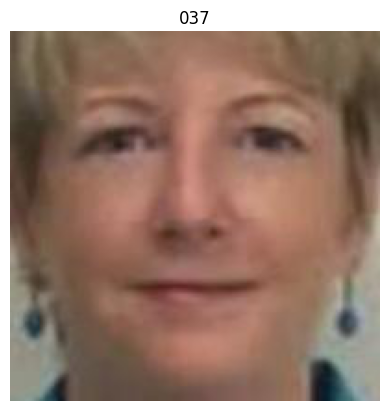

In [ ]:
img = view_random_image(target_dir="train",
                  target_class=random.choice(class_names))


## 2. Preprocess the data

In [ ]:
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(200, 200),
                                               batch_size=16,
                                               class_mode='categorical')

test_data = train_datagen.flow_from_directory(test_dir,
                                              target_size=(200, 200),
                                              batch_size=16,
                                              class_mode='categorical')

Found 7746 images belonging to 94 classes.
Found 2009 images belonging to 94 classes.


In [ ]:
# Create a model
model_1 = Sequential([
    Conv2D(64,5,activation="relu",input_shape=(200,200,3)),
    Conv2D(64,5,activation="relu"),
    MaxPool2D(),
    Conv2D(64,5,activation="relu"),
    Conv2D(64,5,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(94,activation = "softmax")
])

# Compile the model
model_1.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
model_1.fit(train_data,
            epochs=10,
            steps_per_epoch=len(train_data),
            validation_data=test_data,
            validation_steps=len(test_data))


Epoch 1/10
485/485 [==============================] - 67s 107ms/step - loss: 4.0856 - accuracy: 0.1177 - val_loss: 3.9217 - val_accuracy: 0.1249
Epoch 2/10
485/485 [==============================] - 51s 105ms/step - loss: 3.5605 - accuracy: 0.1615 - val_loss: 3.7521 - val_accuracy: 0.1603
Epoch 3/10
485/485 [==============================] - 46s 95ms/step - loss: 2.9147 - accuracy: 0.2573 - val_loss: 3.8827 - val_accuracy: 0.1588
Epoch 4/10
485/485 [==============================] - 46s 94ms/step - loss: 2.1909 - accuracy: 0.4096 - val_loss: 4.2177 - val_accuracy: 0.1508
Epoch 5/10
485/485 [==============================] - 51s 104ms/step - loss: 1.5081 - accuracy: 0.5784 - val_loss: 5.2776 - val_accuracy: 0.1558
Epoch 6/10
485/485 [==============================] - 46s 94ms/step - loss: 0.9278 - accuracy: 0.7364 - val_loss: 6.4931 - val_accuracy: 0.1414
Epoch 7/10
485/485 [==============================] - 46s 95ms/step - loss: 0.5333 - accuracy: 0.8568 - val_loss: 7.7868 - val_accura

The model is overfitting the data too much....Let's reduce the overfitting by decreasing the number of filters and augmentind the data

In [ ]:
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=20, # note: this is an int not a float
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             zoom_range=0.2,
                                             horizontal_flip=True)

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                              target_size=(200, 200),
                                              batch_size=16,
                                              class_mode='categorical')

Found 7746 images belonging to 94 classes.


In [ ]:
# Create a model
model_2 = Sequential([
    Conv2D(32,3,activation="relu",input_shape=(200,200,3)),
    Conv2D(32,3,activation="relu"),
    MaxPool2D(),
    Conv2D(32,3,activation="relu"),
    Conv2D(32,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(94,activation = "softmax")
])

# Compile the model
model_2.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_2 = model_2.fit(train_data_augmented,
            epochs=20,
            steps_per_epoch=len(train_data_augmented),
            validation_data=test_data,
            validation_steps=len(test_data))


Epoch 1/20
485/485 [==============================] - 109s 218ms/step - loss: 4.1303 - accuracy: 0.1149 - val_loss: 4.0655 - val_accuracy: 0.1200
Epoch 2/20
485/485 [==============================] - 103s 213ms/step - loss: 4.0204 - accuracy: 0.1219 - val_loss: 4.0408 - val_accuracy: 0.1249
Epoch 3/20
485/485 [==============================] - 108s 223ms/step - loss: 4.0056 - accuracy: 0.1214 - val_loss: 3.9954 - val_accuracy: 0.1264
Epoch 4/20
485/485 [==============================] - 104s 213ms/step - loss: 3.9688 - accuracy: 0.1228 - val_loss: 3.9848 - val_accuracy: 0.1190
Epoch 5/20
485/485 [==============================] - 104s 215ms/step - loss: 3.9425 - accuracy: 0.1252 - val_loss: 3.9934 - val_accuracy: 0.1279
Epoch 6/20
485/485 [==============================] - 104s 213ms/step - loss: 3.9233 - accuracy: 0.1278 - val_loss: 3.9761 - val_accuracy: 0.1215
Epoch 7/20
485/485 [==============================] - 103s 212ms/step - loss: 3.9160 - accuracy: 0.1263 - val_loss: 3.9270 -

KeyboardInterrupt: ignored

In [ ]:
minority_class = ["061","077","078","082","069","086","089","046","091","074","063","070","088","044","055","081","083","092","066","084","076","067","064","071","093","079","095","087","033","073"]

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from imblearn.over_sampling import RandomOverSampler

# Create an ImageDataGenerator for your training data
train_datagen = ImageDataGenerator(
    rescale=1/255.,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

# Create a generator for your original training data
train_generator = train_datagen.flow_from_directory(
    directory=train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',  # or 'binary', depending on your task
    shuffle=True
)

# Get the minority class samples
minority_class_samples = [x for x, y in zip(train_generator.filenames, train_generator.labels) if y[1] == 1]  # Assuming binary classification

# Oversample the minority class
ros = RandomOverSampler(sampling_strategy='auto', random_state=42)
oversampled_samples, oversampled_labels = ros.fit_resample(minority_class_samples, [1] * len(minority_class_samples))

# Combine oversampled data with original data
combined_samples = train_generator.filenames + oversampled_samples
combined_labels = train_generator.labels + oversampled_labels

# Create a new generator with the combined data
combined_generator = train_datagen.flow_from_directory(
    directory=train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',  # or 'binary', depending on your task
    shuffle=True
)


Found 7746 images belonging to 94 classes.


IndexError: ignored

In [ ]:
!pip install opencv-python-headless
!pip install Augmentor

In [ ]:
import os
import random
import shutil
import Augmentor

# Define the input directory containing subdirectories for each class
input_directory = "/content/train"
output_root_directory = "/content/drive/MyDrive/Final Project"
target_num_images_per_class = 150  # Desired number of images per class

# Create the output root directory if it doesn't exist
os.makedirs(output_root_directory, exist_ok=True)

# List all class directories in the input directory
class_directories = os.listdir(input_directory)

# Iterate through each class directory
for class_dir in class_directories:
    class_path = os.path.join(input_directory, class_dir)

    # List all image files in the class directory
    image_files = [os.path.join(class_path, filename) for filename in os.listdir(class_path) if filename.endswith(".jpg")]

    # Calculate the number of images in this class
    num_images_in_class = len(image_files)

    # Determine how many images to sample or augment to reach the target count
    if num_images_in_class < target_num_images_per_class:
        # Create an Augmentor pipeline for this class
        p = Augmentor.Pipeline(class_path, output_directory=os.path.join(output_root_directory, class_dir))

        # Define your augmentation operations here
        p.rotate(probability=0.7, max_left_rotation=25, max_right_rotation=25)
        p.flip_left_right(probability=0.5)
        p.zoom_random(probability=0.5, percentage_area=0.8)
        p.random_contrast(probability=0.5, min_factor=0.7, max_factor=1.3)

        # Calculate how many augmented images are needed
        num_augmented_images = target_num_images_per_class - num_images_in_class

        # Sample from the pipeline to generate augmented images
        p.sample(num_augmented_images)

# Your balanced dataset with exactly 150 images per class is now in the 'output_root_directory',
# with subdirectories corresponding to their class.


Initialised with 14 image(s) found.
Output directory set to /content/drive/MyDrive/Final Project/077.

Processing <PIL.Image.Image image mode=RGB size=200x200 at 0x793432E36BF0>: 100%|██████████| 150/150 [00:04<00:00, 33.46 Samples/s]


Initialised with 90 image(s) found.
Output directory set to /content/drive/MyDrive/Final Project/065.

Processing <PIL.Image.Image image mode=RGB size=200x200 at 0x7934D1E6E110>: 100%|██████████| 150/150 [00:05<00:00, 29.18 Samples/s]


Initialised with 16 image(s) found.
Output directory set to /content/drive/MyDrive/Final Project/086.

Processing <PIL.Image.Image image mode=RGB size=200x200 at 0x7934D04B5A20>: 100%|██████████| 150/150 [00:03<00:00, 39.43 Samples/s]


Initialised with 38 image(s) found.
Output directory set to /content/drive/MyDrive/Final Project/063.

Processing <PIL.Image.Image image mode=RGB size=200x200 at 0x793432E37B50>: 100%|██████████| 150/150 [00:03<00:00, 42.44 Samples/s]


Initialised with 89 image(s) found.
Output directory set to /content/drive/MyDrive/Final Project/054.

Processing <PIL.PngImagePlugin.PngImageFile image mode=RGB size=200x200 at 0x7934D03B72B0>: 100%|██████████| 150/150 [00:03<00:00, 42.79 Samples/s]


Initialised with 13 image(s) found.
Output directory set to /content/drive/MyDrive/Final Project/074.

Processing <PIL.Image.Image image mode=RGB size=200x200 at 0x79342C241DE0>: 100%|██████████| 150/150 [00:05<00:00, 27.76 Samples/s]


Initialised with 141 image(s) found.
Output directory set to /content/drive/MyDrive/Final Project/018.

Processing <PIL.Image.Image image mode=RGB size=200x200 at 0x793432E6FE20>: 100%|██████████| 150/150 [00:03<00:00, 43.33 Samples/s]


Initialised with 72 image(s) found.
Output directory set to /content/drive/MyDrive/Final Project/023.

Processing <PIL.Image.Image image mode=RGB size=200x200 at 0x793432F73520>: 100%|██████████| 150/150 [00:03<00:00, 40.03 Samples/s]


Initialised with 69 image(s) found.
Output directory set to /content/drive/MyDrive/Final Project/034.

Processing <PIL.Image.Image image mode=RGB size=200x200 at 0x79342C2B92D0>: 100%|██████████| 150/150 [00:04<00:00, 36.16 Samples/s]


Initialised with 102 image(s) found.
Output directory set to /content/drive/MyDrive/Final Project/007.

Processing <PIL.Image.Image image mode=RGB size=200x200 at 0x793432E35090>: 100%|██████████| 150/150 [00:04<00:00, 31.86 Samples/s]


Initialised with 100 image(s) found.
Output directory set to /content/drive/MyDrive/Final Project/035.

Processing <PIL.Image.Image image mode=RGB size=200x200 at 0x7934362CA560>: 100%|██████████| 150/150 [00:03<00:00, 43.62 Samples/s]


Initialised with 194 image(s) found.
Output directory set to /content/drive/MyDrive/Final Project/008.

Processing <PIL.Image.Image image mode=RGB size=200x200 at 0x793432E7FF40>: 100%|██████████| 150/150 [00:03<00:00, 42.10 Samples/s]


Initialised with 134 image(s) found.
Output directory set to /content/drive/MyDrive/Final Project/009.

Processing <PIL.Image.Image image mode=RGB size=200x200 at 0x7934D36FBF40>: 100%|██████████| 150/150 [00:05<00:00, 28.71 Samples/s]


Initialised with 11 image(s) found.
Output directory set to /content/drive/MyDrive/Final Project/092.

Processing <PIL.Image.Image image mode=RGB size=200x200 at 0x7934D1DEDF90>: 100%|██████████| 150/150 [00:04<00:00, 37.04 Samples/s]


Initialised with 48 image(s) found.
Output directory set to /content/drive/MyDrive/Final Project/059.

Processing <PIL.Image.Image image mode=RGB size=200x200 at 0x7934D1DB5780>: 100%|██████████| 150/150 [00:03<00:00, 42.62 Samples/s]


Initialised with 108 image(s) found.
Output directory set to /content/drive/MyDrive/Final Project/010.

Processing <PIL.Image.Image image mode=RGB size=200x200 at 0x7934310230D0>: 100%|██████████| 150/150 [00:03<00:00, 41.37 Samples/s]


Initialised with 80 image(s) found.
Output directory set to /content/drive/MyDrive/Final Project/031.

Processing <PIL.Image.Image image mode=RGB size=200x200 at 0x79343163A3E0>: 100%|██████████| 150/150 [00:05<00:00, 27.58 Samples/s]


Initialised with 87 image(s) found.
Output directory set to /content/drive/MyDrive/Final Project/036.

Processing <PIL.Image.Image image mode=RGB size=200x200 at 0x793430D49E40>: 100%|██████████| 150/150 [00:03<00:00, 42.07 Samples/s]


Initialised with 28 image(s) found.
Output directory set to /content/drive/MyDrive/Final Project/073.

Processing <PIL.Image.Image image mode=RGB size=200x200 at 0x793431765A50>: 100%|██████████| 150/150 [00:03<00:00, 42.98 Samples/s]


Initialised with 40 image(s) found.
Output directory set to /content/drive/MyDrive/Final Project/067.

Processing <PIL.Image.Image image mode=RGB size=200x200 at 0x7934D03E4B80>: 100%|██████████| 150/150 [00:04<00:00, 35.50 Samples/s]


Initialised with 149 image(s) found.
Output directory set to /content/drive/MyDrive/Final Project/005.

Processing <PIL.Image.Image image mode=RGB size=200x200 at 0x7934D04E3EB0>: 100%|██████████| 150/150 [00:04<00:00, 31.65 Samples/s]


Initialised with 60 image(s) found.
Output directory set to /content/drive/MyDrive/Final Project/040.

Processing <PIL.Image.Image image mode=RGB size=200x200 at 0x7934D04AB4C0>: 100%|██████████| 150/150 [00:03<00:00, 42.89 Samples/s]


Initialised with 44 image(s) found.
Output directory set to /content/drive/MyDrive/Final Project/043.

Processing <PIL.Image.Image image mode=RGB size=200x200 at 0x7934D1DEE350>: 100%|██████████| 150/150 [00:03<00:00, 41.46 Samples/s]


Initialised with 107 image(s) found.
Output directory set to /content/drive/MyDrive/Final Project/056.

Processing <PIL.PngImagePlugin.PngImageFile image mode=RGB size=200x200 at 0x7934D1E6D540>: 100%|██████████| 150/150 [00:04<00:00, 30.22 Samples/s]


Initialised with 59 image(s) found.
Output directory set to /content/drive/MyDrive/Final Project/062.

Processing <PIL.Image.Image image mode=RGB size=200x200 at 0x7934311C7BB0>: 100%|██████████| 150/150 [00:04<00:00, 36.98 Samples/s]


Initialised with 39 image(s) found.
Output directory set to /content/drive/MyDrive/Final Project/061.

Processing <PIL.Image.Image image mode=RGB size=200x200 at 0x793430D49C90>: 100%|██████████| 150/150 [00:03<00:00, 41.66 Samples/s]


Initialised with 105 image(s) found.
Output directory set to /content/drive/MyDrive/Final Project/039.

Processing <PIL.PngImagePlugin.PngImageFile image mode=RGB size=200x200 at 0x7934D36FB3A0>: 100%|██████████| 150/150 [00:04<00:00, 32.04 Samples/s]


Initialised with 106 image(s) found.
Output directory set to /content/drive/MyDrive/Final Project/085.

Processing <PIL.Image.Image image mode=RGB size=200x200 at 0x7934D36FBAF0>: 100%|██████████| 150/150 [00:05<00:00, 28.66 Samples/s]


Initialised with 884 image(s) found.
Output directory set to /content/drive/MyDrive/Final Project/001.

Processing <PIL.Image.Image image mode=RGB size=200x200 at 0x7934D36FBF40>: 100%|██████████| 150/150 [00:03<00:00, 38.33 Samples/s]


Initialised with 48 image(s) found.
Output directory set to /content/drive/MyDrive/Final Project/019.

Processing <PIL.Image.Image image mode=RGB size=200x200 at 0x79342C241DE0>: 100%|██████████| 150/150 [00:03<00:00, 40.69 Samples/s]


Initialised with 44 image(s) found.
Output directory set to /content/drive/MyDrive/Final Project/041.

Processing <PIL.Image.Image image mode=RGB size=200x200 at 0x7934311C7E20>: 100%|██████████| 150/150 [00:05<00:00, 29.78 Samples/s]


Initialised with 37 image(s) found.
Output directory set to /content/drive/MyDrive/Final Project/066.

Processing <PIL.Image.Image image mode=RGB size=200x200 at 0x793431021A50>: 100%|██████████| 150/150 [00:04<00:00, 36.00 Samples/s]


Initialised with 106 image(s) found.
Output directory set to /content/drive/MyDrive/Final Project/015.

Processing <PIL.Image.Image image mode=RGB size=200x200 at 0x7934D03E69B0>: 100%|██████████| 150/150 [00:03<00:00, 41.45 Samples/s]


Initialised with 373 image(s) found.
Output directory set to /content/drive/MyDrive/Final Project/002.

Processing <PIL.Image.Image image mode=RGB size=200x200 at 0x7934D04A65F0>: 100%|██████████| 150/150 [00:04<00:00, 37.02 Samples/s]


Initialised with 53 image(s) found.
Output directory set to /content/drive/MyDrive/Final Project/072.

Processing <PIL.Image.Image image mode=RGB size=200x200 at 0x793557B36560>: 100%|██████████| 150/150 [00:05<00:00, 28.07 Samples/s]


Initialised with 150 image(s) found.
Output directory set to /content/drive/MyDrive/Final Project/024.

Processing <PIL.Image.Image image mode=RGB size=200x200 at 0x793451B982B0>: 100%|██████████| 150/150 [00:03<00:00, 42.56 Samples/s]


Initialised with 94 image(s) found.
Output directory set to /content/drive/MyDrive/Final Project/006.

Processing <PIL.Image.Image image mode=RGB size=200x200 at 0x7934400F2E00>: 100%|██████████| 150/150 [00:03<00:00, 44.05 Samples/s]


Initialised with 53 image(s) found.
Output directory set to /content/drive/MyDrive/Final Project/051.

Processing <PIL.Image.Image image mode=RGB size=200x200 at 0x7934D04E34F0>: 100%|██████████| 150/150 [00:05<00:00, 25.53 Samples/s]


Initialised with 172 image(s) found.
Output directory set to /content/drive/MyDrive/Final Project/016.

Processing <PIL.Image.Image image mode=RGB size=200x200 at 0x79346A9A7F40>: 100%|██████████| 150/150 [00:05<00:00, 27.28 Samples/s]


Initialised with 11 image(s) found.
Output directory set to /content/drive/MyDrive/Final Project/079.

Processing <PIL.Image.Image image mode=RGB size=200x200 at 0x793436422410>: 100%|██████████| 150/150 [00:03<00:00, 40.08 Samples/s]


Initialised with 23 image(s) found.
Output directory set to /content/drive/MyDrive/Final Project/082.

Processing <PIL.Image.Image image mode=RGB size=200x200 at 0x7934D04AB4C0>: 100%|██████████| 150/150 [00:03<00:00, 40.95 Samples/s]


Initialised with 102 image(s) found.
Output directory set to /content/drive/MyDrive/Final Project/022.

Processing <PIL.Image.Image image mode=RGB size=200x200 at 0x7933E84C65C0>: 100%|██████████| 150/150 [00:04<00:00, 34.65 Samples/s]


Initialised with 10 image(s) found.
Output directory set to /content/drive/MyDrive/Final Project/088.

Processing <PIL.Image.Image image mode=RGB size=200x200 at 0x7934D04E3EB0>: 100%|██████████| 150/150 [00:04<00:00, 31.22 Samples/s]


Initialised with 108 image(s) found.
Output directory set to /content/drive/MyDrive/Final Project/052.

Processing <PIL.Image.Image image mode=RGB size=200x200 at 0x7934D1DCF280>: 100%|██████████| 150/150 [00:03<00:00, 40.62 Samples/s]


Initialised with 60 image(s) found.
Output directory set to /content/drive/MyDrive/Final Project/013.

Processing <PIL.Image.Image image mode=RGB size=200x200 at 0x793432F70E20>: 100%|██████████| 150/150 [00:03<00:00, 42.14 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/drive/MyDrive/Final Project/050.

Processing <PIL.Image.Image image mode=RGB size=200x200 at 0x7933E8549BD0>: 100%|██████████| 150/150 [00:05<00:00, 28.44 Samples/s]


Initialised with 73 image(s) found.
Output directory set to /content/drive/MyDrive/Final Project/037.

Processing <PIL.Image.Image image mode=RGB size=200x200 at 0x79343163B340>: 100%|██████████| 150/150 [00:03<00:00, 38.88 Samples/s]


Initialised with 124 image(s) found.
Output directory set to /content/drive/MyDrive/Final Project/025.

Processing <PIL.Image.Image image mode=RGB size=200x200 at 0x79343637E860>: 100%|██████████| 150/150 [00:03<00:00, 42.24 Samples/s]


Initialised with 92 image(s) found.
Output directory set to /content/drive/MyDrive/Final Project/027.

Processing <PIL.Image.Image image mode=RGB size=200x200 at 0x7934310D4520>: 100%|██████████| 150/150 [00:03<00:00, 41.94 Samples/s]


Initialised with 47 image(s) found.
Output directory set to /content/drive/MyDrive/Final Project/011.

Processing <PIL.Image.Image image mode=RGB size=200x200 at 0x7934D04B4EE0>: 100%|██████████| 150/150 [00:05<00:00, 27.50 Samples/s]


Initialised with 232 image(s) found.
Output directory set to /content/drive/MyDrive/Final Project/003.

Processing <PIL.Image.Image image mode=RGB size=200x200 at 0x7934D0511630>: 100%|██████████| 150/150 [00:03<00:00, 42.51 Samples/s]


Initialised with 4 image(s) found.
Output directory set to /content/drive/MyDrive/Final Project/087.

Processing <PIL.Image.Image image mode=RGB size=200x200 at 0x793432E6E470>: 100%|██████████| 150/150 [00:04<00:00, 33.99 Samples/s]


Initialised with 90 image(s) found.
Output directory set to /content/drive/MyDrive/Final Project/020.

Processing <PIL.Image.Image image mode=RGB size=200x200 at 0x79343157DF30>: 100%|██████████| 150/150 [00:04<00:00, 34.09 Samples/s]


Initialised with 9 image(s) found.
Output directory set to /content/drive/MyDrive/Final Project/081.

Processing <PIL.Image.Image image mode=RGB size=200x200 at 0x793436423910>: 100%|██████████| 150/150 [00:04<00:00, 31.97 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/Final Project/091.

Processing <PIL.Image.Image image mode=RGB size=200x200 at 0x793451B994E0>: 100%|██████████| 150/150 [00:03<00:00, 40.50 Samples/s]


Initialised with 36 image(s) found.
Output directory set to /content/drive/MyDrive/Final Project/069.

Processing <PIL.Image.Image image mode=RGB size=200x200 at 0x7934D36FB3A0>: 100%|██████████| 150/150 [00:03<00:00, 41.57 Samples/s]


Initialised with 126 image(s) found.
Output directory set to /content/drive/MyDrive/Final Project/028.

Processing <PIL.Image.Image image mode=RGB size=200x200 at 0x7933E84C7580>: 100%|██████████| 150/150 [00:04<00:00, 30.34 Samples/s]


Initialised with 48 image(s) found.
Output directory set to /content/drive/MyDrive/Final Project/057.

Processing <PIL.Image.Image image mode=RGB size=200x200 at 0x7934310230D0>: 100%|██████████| 150/150 [00:04<00:00, 36.46 Samples/s]


Initialised with 17 image(s) found.
Output directory set to /content/drive/MyDrive/Final Project/071.

Processing <PIL.Image.Image image mode=RGB size=200x200 at 0x79346A9A7F40>: 100%|██████████| 150/150 [00:03<00:00, 39.37 Samples/s]


Initialised with 61 image(s) found.
Output directory set to /content/drive/MyDrive/Final Project/045.

Processing <PIL.PngImagePlugin.PngImageFile image mode=RGB size=200x200 at 0x793432E6E650>: 100%|██████████| 150/150 [00:04<00:00, 37.00 Samples/s]


Initialised with 113 image(s) found.
Output directory set to /content/drive/MyDrive/Final Project/060.

Processing <PIL.Image.Image image mode=RGB size=200x200 at 0x793436171FF0>: 100%|██████████| 150/150 [00:06<00:00, 24.06 Samples/s]


Initialised with 83 image(s) found.
Output directory set to /content/drive/MyDrive/Final Project/058.

Processing <PIL.Image.Image image mode=RGB size=200x200 at 0x79343163B340>: 100%|██████████| 150/150 [00:04<00:00, 31.08 Samples/s]


Initialised with 66 image(s) found.
Output directory set to /content/drive/MyDrive/Final Project/075.

Processing <PIL.Image.Image image mode=RGB size=200x200 at 0x793432E358D0>: 100%|██████████| 150/150 [00:03<00:00, 42.10 Samples/s]


Initialised with 39 image(s) found.
Output directory set to /content/drive/MyDrive/Final Project/070.

Processing <PIL.Image.Image image mode=RGB size=200x200 at 0x793431666260>: 100%|██████████| 150/150 [00:03<00:00, 41.72 Samples/s]


Initialised with 13 image(s) found.
Output directory set to /content/drive/MyDrive/Final Project/089.

Processing <PIL.Image.Image image mode=RGB size=200x200 at 0x793430FCD720>: 100%|██████████| 150/150 [00:05<00:00, 27.60 Samples/s]


Initialised with 214 image(s) found.
Output directory set to /content/drive/MyDrive/Final Project/026.

Processing <PIL.Image.Image image mode=RGB size=200x200 at 0x793432ED7E80>: 100%|██████████| 150/150 [00:03<00:00, 39.84 Samples/s]


Initialised with 115 image(s) found.
Output directory set to /content/drive/MyDrive/Final Project/029.

Processing <PIL.Image.Image image mode=RGB size=200x200 at 0x793432EDF370>: 100%|██████████| 150/150 [00:03<00:00, 41.94 Samples/s]


Initialised with 85 image(s) found.
Output directory set to /content/drive/MyDrive/Final Project/017.

Processing <PIL.Image.Image image mode=RGB size=200x200 at 0x7934361703A0>: 100%|██████████| 150/150 [00:03<00:00, 39.92 Samples/s]


Initialised with 7 image(s) found.
Output directory set to /content/drive/MyDrive/Final Project/084.

Processing <PIL.Image.Image image mode=RGB size=200x200 at 0x7934362C8640>: 100%|██████████| 150/150 [00:05<00:00, 26.23 Samples/s]


Initialised with 101 image(s) found.
Output directory set to /content/drive/MyDrive/Final Project/021.

Processing <PIL.Image.Image image mode=RGB size=200x200 at 0x79342C431570>: 100%|██████████| 150/150 [00:03<00:00, 42.45 Samples/s]


Initialised with 3 image(s) found.
Output directory set to /content/drive/MyDrive/Final Project/083.

Processing <PIL.Image.Image image mode=RGB size=200x200 at 0x7934362C8640>: 100%|██████████| 150/150 [00:03<00:00, 41.65 Samples/s]


Initialised with 69 image(s) found.
Output directory set to /content/drive/MyDrive/Final Project/038.

Processing <PIL.Image.Image image mode=RGB size=200x200 at 0x7934D03E6DD0>: 100%|██████████| 150/150 [00:04<00:00, 34.81 Samples/s]


Initialised with 68 image(s) found.
Output directory set to /content/drive/MyDrive/Final Project/042.

Processing <PIL.Image.Image image mode=RGB size=200x200 at 0x7934310D7550>: 100%|██████████| 150/150 [00:04<00:00, 30.09 Samples/s]


Initialised with 105 image(s) found.
Output directory set to /content/drive/MyDrive/Final Project/032.

Processing <PIL.Image.Image image mode=RGB size=200x200 at 0x793432ED70A0>: 100%|██████████| 150/150 [00:03<00:00, 42.22 Samples/s]


Initialised with 31 image(s) found.
Output directory set to /content/drive/MyDrive/Final Project/076.

Processing <PIL.Image.Image image mode=RGB size=200x200 at 0x793432EAEB30>: 100%|██████████| 150/150 [00:03<00:00, 41.13 Samples/s]


Initialised with 32 image(s) found.
Output directory set to /content/drive/MyDrive/Final Project/055.

Processing <PIL.Image.Image image mode=RGB size=200x200 at 0x793430BCC430>: 100%|██████████| 150/150 [00:04<00:00, 30.21 Samples/s]


Initialised with 46 image(s) found.
Output directory set to /content/drive/MyDrive/Final Project/090.

Processing <PIL.Image.Image image mode=RGB size=200x200 at 0x79342C432350>: 100%|██████████| 150/150 [00:04<00:00, 34.17 Samples/s]


Initialised with 105 image(s) found.
Output directory set to /content/drive/MyDrive/Final Project/014.

Processing <PIL.Image.Image image mode=RGB size=200x200 at 0x79343637E860>: 100%|██████████| 150/150 [00:03<00:00, 41.96 Samples/s]


Initialised with 117 image(s) found.
Output directory set to /content/drive/MyDrive/Final Project/053.

Processing <PIL.Image.Image image mode=RGB size=200x200 at 0x793432E2F9A0>: 100%|██████████| 150/150 [00:03<00:00, 42.77 Samples/s]


Initialised with 22 image(s) found.
Output directory set to /content/drive/MyDrive/Final Project/078.

Processing <PIL.Image.Image image mode=RGB size=200x200 at 0x793432F72590>: 100%|██████████| 150/150 [00:05<00:00, 26.92 Samples/s]


Initialised with 60 image(s) found.
Output directory set to /content/drive/MyDrive/Final Project/080.

Processing <PIL.Image.Image image mode=RGB size=200x200 at 0x7934D04B5210>: 100%|██████████| 150/150 [00:04<00:00, 36.58 Samples/s]


Initialised with 85 image(s) found.
Output directory set to /content/drive/MyDrive/Final Project/049.

Processing <PIL.Image.Image image mode=RGB size=200x200 at 0x7934D03B7A60>: 100%|██████████| 150/150 [00:03<00:00, 40.54 Samples/s]


Initialised with 24 image(s) found.
Output directory set to /content/drive/MyDrive/Final Project/044.

Processing <PIL.Image.Image image mode=RGB size=200x200 at 0x793432E2DAB0>: 100%|██████████| 150/150 [00:04<00:00, 30.45 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/Final Project/093.

Processing <PIL.Image.Image image mode=RGB size=200x200 at 0x793432EE7670>: 100%|██████████| 150/150 [00:05<00:00, 29.31 Samples/s]


Initialised with 45 image(s) found.
Output directory set to /content/drive/MyDrive/Final Project/046.

Processing <PIL.Image.Image image mode=RGB size=200x200 at 0x7934317433D0>: 100%|██████████| 150/150 [00:03<00:00, 40.15 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/Final Project/095.

Processing <PIL.Image.Image image mode=RGB size=200x200 at 0x793430FCD8A0>: 100%|██████████| 150/150 [00:03<00:00, 39.55 Samples/s]


Initialised with 21 image(s) found.
Output directory set to /content/drive/MyDrive/Final Project/064.

Processing <PIL.Image.Image image mode=RGB size=200x200 at 0x793432EC76A0>: 100%|██████████| 150/150 [00:04<00:00, 31.31 Samples/s]


Initialised with 214 image(s) found.
Output directory set to /content/drive/MyDrive/Final Project/004.

Processing <PIL.Image.Image image mode=RGB size=200x200 at 0x79343637E860>: 100%|██████████| 150/150 [00:04<00:00, 33.63 Samples/s]


Initialised with 50 image(s) found.
Output directory set to /content/drive/MyDrive/Final Project/048.

Processing <PIL.Image.Image image mode=RGB size=200x200 at 0x793432EAC760>: 100%|██████████| 150/150 [00:03<00:00, 40.96 Samples/s]


Initialised with 57 image(s) found.
Output directory set to /content/drive/MyDrive/Final Project/047.

Processing <PIL.Image.Image image mode=RGB size=200x200 at 0x793432EE51B0>: 100%|██████████| 150/150 [00:03<00:00, 40.37 Samples/s]


Initialised with 35 image(s) found.
Output directory set to /content/drive/MyDrive/Final Project/033.

Processing <PIL.Image.Image image mode=RGB size=200x200 at 0x7934D04AA620>: 100%|██████████| 150/150 [00:05<00:00, 27.03 Samples/s]


Initialised with 41 image(s) found.
Output directory set to /content/drive/MyDrive/Final Project/068.

Processing <PIL.Image.Image image mode=RGB size=200x200 at 0x793432EC4A00>: 100%|██████████| 150/150 [00:03<00:00, 38.69 Samples/s]


Initialised with 81 image(s) found.
Output directory set to /content/drive/MyDrive/Final Project/012.

Processing <PIL.Image.Image image mode=RGB size=200x200 at 0x793432ED6F20>: 100%|██████████| 150/150 [00:03<00:00, 40.51 Samples/s]


Initialised with 89 image(s) found.
Output directory set to /content/drive/MyDrive/Final Project/030.

Processing <PIL.Image.Image image mode=RGB size=200x200 at 0x793432EC5DE0>: 100%|██████████| 150/150 [00:04<00:00, 36.65 Samples/s]


In [ ]:
# Walk through train directory and list number of files
for dirpath, dirnames, filenames in os.walk("aug"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 94 directories and 0 images in 'aug'.
There are 0 directories and 150 images in 'aug/077'.
There are 0 directories and 150 images in 'aug/065'.
There are 0 directories and 150 images in 'aug/086'.
There are 0 directories and 150 images in 'aug/063'.
There are 0 directories and 150 images in 'aug/054'.
There are 0 directories and 150 images in 'aug/074'.
There are 0 directories and 150 images in 'aug/018'.
There are 0 directories and 150 images in 'aug/023'.
There are 0 directories and 150 images in 'aug/034'.
There are 0 directories and 150 images in 'aug/007'.
There are 0 directories and 150 images in 'aug/035'.
There are 0 directories and 150 images in 'aug/008'.
There are 0 directories and 150 images in 'aug/009'.
There are 0 directories and 150 images in 'aug/092'.
There are 0 directories and 150 images in 'aug/059'.
There are 0 directories and 150 images in 'aug/010'.
There are 0 directories and 150 images in 'aug/031'.
There are 0 directories and 150 images in 'aug/036'

In [ ]:
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(200, 200),
                                               batch_size=16,
                                               class_mode='categorical')

test_data = train_datagen.flow_from_directory(test_dir,
                                              target_size=(200, 200),
                                              batch_size=16,
                                              class_mode='categorical')

Found 8654 images belonging to 94 classes.
Found 2009 images belonging to 94 classes.


In [ ]:
# Create a model
model_3 = Sequential([
    Conv2D(64,5,activation="relu",input_shape=(200,200,3)),
    Conv2D(64,5,activation="relu"),
    MaxPool2D(),
    Conv2D(64,5,activation="relu"),
    Conv2D(64,5,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(94,activation = "softmax")
])

# Compile the model
model_3.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_3 = model_3.fit(train_data,
            epochs=10,
            steps_per_epoch=len(train_data),
            validation_data=test_data,
            validation_steps=len(test_data))


Epoch 1/10
541/541 [==============================] - 71s 100ms/step - loss: 4.2778 - accuracy: 0.1054 - val_loss: 4.0396 - val_accuracy: 0.1249
Epoch 2/10
541/541 [==============================] - 50s 93ms/step - loss: 3.7931 - accuracy: 0.1526 - val_loss: 3.8020 - val_accuracy: 0.1284
Epoch 3/10
541/541 [==============================] - 50s 93ms/step - loss: 2.9815 - accuracy: 0.2729 - val_loss: 3.9131 - val_accuracy: 0.1448
Epoch 4/10
541/541 [==============================] - 50s 93ms/step - loss: 1.7792 - accuracy: 0.5257 - val_loss: 4.7148 - val_accuracy: 0.1553
Epoch 5/10
541/541 [==============================] - 50s 93ms/step - loss: 0.8380 - accuracy: 0.7724 - val_loss: 6.3974 - val_accuracy: 0.1518
Epoch 6/10
541/541 [==============================] - 51s 94ms/step - loss: 0.3646 - accuracy: 0.9100 - val_loss: 8.4662 - val_accuracy: 0.1483
Epoch 7/10
541/541 [==============================] - 51s 95ms/step - loss: 0.2192 - accuracy: 0.9569 - val_loss: 7.5584 - val_accuracy

In [ ]:
# Create a model
model_4 = Sequential([
    Conv2D(64,5,activation="relu",input_shape=(200,200,3)),
    MaxPool2D(),
    Conv2D(64,5,activation="relu"),
    MaxPool2D(),
    Conv2D(64,5,activation="relu"),
    MaxPool2D(),
    Conv2D(64,5,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(264,activation="relu"),
    Dense(94,activation = "softmax")
])

# Compile the model
model_4.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_4 = model_4.fit(train_data,
            epochs=10,
            steps_per_epoch=len(train_data),
            validation_data=test_data,
            validation_steps=len(test_data))


Epoch 1/10
541/541 [==============================] - 41s 66ms/step - loss: 4.3016 - accuracy: 0.1019 - val_loss: 4.1506 - val_accuracy: 0.1135
Epoch 2/10
541/541 [==============================] - 33s 61ms/step - loss: 3.8776 - accuracy: 0.1196 - val_loss: 3.6293 - val_accuracy: 0.1369
Epoch 3/10
541/541 [==============================] - 34s 63ms/step - loss: 3.3958 - accuracy: 0.1609 - val_loss: 3.5292 - val_accuracy: 0.1434
Epoch 4/10
541/541 [==============================] - 38s 71ms/step - loss: 3.1452 - accuracy: 0.1979 - val_loss: 3.4254 - val_accuracy: 0.1598
Epoch 5/10
541/541 [==============================] - 33s 61ms/step - loss: 2.9377 - accuracy: 0.2320 - val_loss: 3.3945 - val_accuracy: 0.1583
Epoch 6/10
541/541 [==============================] - 34s 64ms/step - loss: 2.7527 - accuracy: 0.2646 - val_loss: 3.3489 - val_accuracy: 0.1672
Epoch 7/10
541/541 [==============================] - 33s 61ms/step - loss: 2.5896 - accuracy: 0.3016 - val_loss: 3.4639 - val_accuracy:

<Axes: >

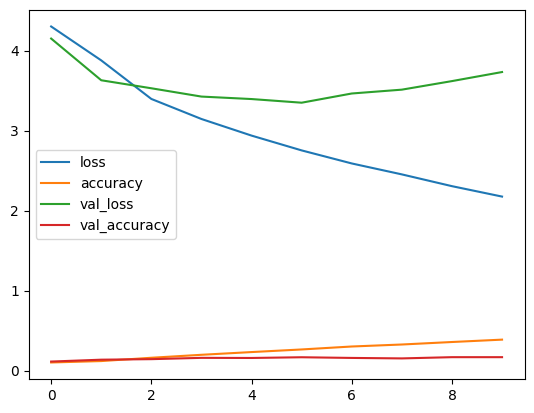

In [ ]:
pd.DataFrame(history_4.history).plot()

In [ ]:
# Create a model
model_3 = Sequential([
    Conv2D(32,3,activation="relu",input_shape=(200,200,3)),
    Conv2D(32,3,activation="relu"),
    Conv2D(32,3,activation="relu"),
    MaxPool2D(),
    Conv2D(64,5,activation="relu"),
    Conv2D(32,3,activation="relu"),
    Conv2D(32,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(94,activation = "softmax")
])

# Compile the model
model_3.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_3 = model_3.fit(train_data,
            epochs=10,
            steps_per_epoch=len(train_data),
            validation_data=test_data,
            validation_steps=len(test_data))


Epoch 1/10
541/541 [==============================] - 47s 75ms/step - loss: 4.1388 - accuracy: 0.1123 - val_loss: 3.8256 - val_accuracy: 0.1399
Epoch 2/10
541/541 [==============================] - 38s 70ms/step - loss: 3.2616 - accuracy: 0.2281 - val_loss: 3.6583 - val_accuracy: 0.1374
Epoch 3/10
541/541 [==============================] - 38s 70ms/step - loss: 2.3020 - accuracy: 0.4135 - val_loss: 4.2344 - val_accuracy: 0.1483
Epoch 4/10
541/541 [==============================] - 40s 74ms/step - loss: 1.2943 - accuracy: 0.6502 - val_loss: 4.9135 - val_accuracy: 0.1453
Epoch 5/10
541/541 [==============================] - 38s 70ms/step - loss: 0.5332 - accuracy: 0.8574 - val_loss: 6.1784 - val_accuracy: 0.1493
Epoch 6/10
541/541 [==============================] - 39s 73ms/step - loss: 0.2553 - accuracy: 0.9477 - val_loss: 8.0423 - val_accuracy: 0.1488
Epoch 7/10
541/541 [==============================] - 39s 71ms/step - loss: 0.1743 - accuracy: 0.9713 - val_loss: 8.3727 - val_accuracy:

In [ ]:
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(200, 200),
                                               batch_size=32,
                                               class_mode='categorical')

test_data = train_datagen.flow_from_directory(test_dir,
                                              target_size=(200, 200),
                                              batch_size=32,
                                              class_mode='categorical')

Found 8654 images belonging to 94 classes.
Found 2009 images belonging to 94 classes.


In [ ]:
# Create a model
model_5 = Sequential([
    Conv2D(64,5,activation="relu",input_shape=(200,200,3)),
    Conv2D(64,5,activation="relu"),
    MaxPool2D(),
    Conv2D(64,5,activation="relu"),
    Conv2D(64,5,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(94,activation = "softmax")
])

# Compile the model
model_5.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_5 = model_5.fit(train_data,
            epochs=10,
            steps_per_epoch=len(train_data),
            validation_data=test_data,
            validation_steps=len(test_data))


Epoch 1/10
271/271 [==============================] - 58s 186ms/step - loss: 4.2127 - accuracy: 0.1079 - val_loss: 3.9810 - val_accuracy: 0.1274
Epoch 2/10
271/271 [==============================] - 46s 169ms/step - loss: 3.6257 - accuracy: 0.1663 - val_loss: 3.7466 - val_accuracy: 0.1473
Epoch 3/10
271/271 [==============================] - 47s 171ms/step - loss: 3.0780 - accuracy: 0.2484 - val_loss: 3.7364 - val_accuracy: 0.1518
Epoch 4/10
271/271 [==============================] - 46s 169ms/step - loss: 2.2405 - accuracy: 0.4170 - val_loss: 4.1421 - val_accuracy: 0.1478
Epoch 5/10
271/271 [==============================] - 45s 167ms/step - loss: 1.3181 - accuracy: 0.6360 - val_loss: 5.4011 - val_accuracy: 0.1508
Epoch 6/10
271/271 [==============================] - 46s 168ms/step - loss: 0.6704 - accuracy: 0.8214 - val_loss: 7.0417 - val_accuracy: 0.1374
Epoch 7/10
271/271 [==============================] - 46s 171ms/step - loss: 0.3529 - accuracy: 0.9192 - val_loss: 9.0325 - val_ac

In [ ]:
train_data=tf.keras.preprocessing.image_dataset_from_directory("train",
                                                               label_mode="categorical",
                                                               batch_size=16,
                                                               image_size=(200,200))

test_data = tf.keras.preprocessing.image_dataset_from_directory("test",
                                                               label_mode="categorical",
                                                               batch_size=16,
                                                               image_size=(200,200))

Found 7746 files belonging to 94 classes.
Found 2009 files belonging to 94 classes.


In [ ]:
len(train_data), len(test_data)

(485, 126)

In [ ]:
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

inputs = tf.keras.layers.Input(shape=(200,200,3))

x = base_model(inputs)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
outputs = tf.keras.layers.Dense(94,activation="softmax")(x)
model_0=tf.keras.Model(inputs,outputs)
model_0.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
history_0 = model_0.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
485/485 [==============================] - 38s 47ms/step - loss: 3.5070 - accuracy: 0.1677 - val_loss: 3.3666 - val_accuracy: 0.1842
Epoch 2/5
485/485 [==============================] - 22s 45ms/step - loss: 3.0909 - accuracy: 0.2115 - val_loss: 3.3287 - val_accuracy: 0.1862
Epoch 3/5
485/485 [==============================] - 22s 44ms/step - loss: 2.9088 - accuracy: 0.2386 - val_loss: 3.3033 - val_accuracy: 0.1906
Epoch 4/5
485/485 [==============================] - 22s 45ms/step - loss: 2.7703 - accuracy: 0.2645 - val_loss: 3.3047 - val_accuracy: 0.1862
Epoch 5/5
485/485 [==============================] - 25s 51ms/step - loss: 2.6541 - accuracy: 0.2900 - val_loss: 3.3074 - val_accuracy: 0.1882


In [ ]:
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.RandomFlip("horizontal"),
  tf.keras.layers.RandomRotation(0.2),
  tf.keras.layers.RandomZoom(0.2),
  tf.keras.layers.RandomHeight(0.2),
  tf.keras.layers.RandomWidth(0.2),
  # preprocessing.Rescaling(1./255) # keep for ResNet50V2, remove for EfficientNet
], name ="data_augmentation")

In [ ]:
# Setup input shape and base model, freezing the base model layers
input_shape = (200, 200, 3)
base_model = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(include_top=False)
base_model.trainable = False

# Create input layer
inputs = tf.keras.layers.Input(shape=input_shape, name="input_layer")

# Add in data augmentation Sequential model as a layer
x = data_augmentation(inputs)

# Give base_model inputs (after augmentation) and don't train it
x = base_model(x, training=False)

# Pool output features of base model
x = tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)

# Put a dense layer on as the output
outputs = tf.keras.layers.Dense(94, activation="softmax", name="output_layer")(x)

# Make a model with inputs and outputs
model_1 = tf.keras.Model(inputs, outputs)

# Compile the model
model_1.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

history_1_percent = model_1.fit(train_data,
                    epochs=50,
                    steps_per_epoch=len(train_data),
                    validation_data=test_data,
                    validation_steps= len(test_data))

Epoch 1/50
485/485 [==============================] - 134s 260ms/step - loss: 3.6942 - accuracy: 0.1467 - val_loss: 3.5754 - val_accuracy: 0.1613
Epoch 2/50
485/485 [==============================] - 74s 153ms/step - loss: 3.3766 - accuracy: 0.1776 - val_loss: 3.4944 - val_accuracy: 0.1687
Epoch 3/50
485/485 [==============================] - 57s 117ms/step - loss: 3.2513 - accuracy: 0.1911 - val_loss: 3.4872 - val_accuracy: 0.1523
Epoch 4/50
485/485 [==============================] - 50s 102ms/step - loss: 3.1710 - accuracy: 0.1982 - val_loss: 3.4460 - val_accuracy: 0.1648
Epoch 5/50
485/485 [==============================] - 47s 96ms/step - loss: 3.1033 - accuracy: 0.2082 - val_loss: 3.4439 - val_accuracy: 0.1677
Epoch 6/50
485/485 [==============================] - 41s 84ms/step - loss: 3.0491 - accuracy: 0.2170 - val_loss: 3.4179 - val_accuracy: 0.1633
Epoch 7/50
485/485 [==============================] - 36s 74ms/step - loss: 3.0018 - accuracy: 0.2236 - val_loss: 3.4490 - val_accu

In [ ]:
train_dataset = tf.keras.preprocessing.image_dataset_from_directory("aug",
                                                                    label_mode="categorical",
                                                                    batch_size=16,
                                                                    image_size=(200,200))
test_dataset = tf.keras.preprocessing.image_dataset_from_directory("test",
                                                                   label_mode="categorical",
                                                                   batch_size=16,
                                                                   image_size=(200,200))


Found 14100 files belonging to 94 classes.
Found 2009 files belonging to 94 classes.


In [ ]:
data_augmentation = tf.keras.models.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomHeight(0.2),
    tf.keras.layers.RandomWidth(0.2),
    tf.keras.layers.RandomZoom(0.1)
], name="data_augmentation")

In [ ]:
base_model = tf.keras.applications.efficientnet.EfficientNetB0(include_top=False)
base_model.trainable = False

inputs = tf.keras.layers.Input(shape=(200,200,3),name="input_layer")
x = data_augmentation(inputs)
x = base_model(x, training = False)
x = tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling_2D")(x)
outputs = tf.keras.layers.Dense(94,activation = "softmax",name="output_layer")(x)
model = tf.keras.Model(inputs,outputs)

16705208/16705208 [==============================] - 0s 0us/step


In [ ]:
model.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

checkpoint_path = "age_detection_checkpoint"
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                      save_weights_only = True,
                                                      monitor = "val_accuracy",
                                                      save_best_only=True)

In [ ]:
history_tl = model.fit(train_dataset,
                       epochs=5,
                       validation_data=test_dataset,
                       validation_steps=len(test_dataset),
                       callbacks=[model_checkpoint])

Epoch 1/5
882/882 [==============================] - 184s 199ms/step - loss: 3.9233 - accuracy: 0.1115 - val_loss: 3.8370 - val_accuracy: 0.0886
Epoch 2/5
882/882 [==============================] - 98s 111ms/step - loss: 3.4340 - accuracy: 0.1838 - val_loss: 3.8185 - val_accuracy: 0.0921
Epoch 3/5
882/882 [==============================] - 96s 109ms/step - loss: 3.2176 - accuracy: 0.2272 - val_loss: 3.8492 - val_accuracy: 0.0886
Epoch 4/5
882/882 [==============================] - 70s 79ms/step - loss: 3.0681 - accuracy: 0.2599 - val_loss: 3.7941 - val_accuracy: 0.1000
Epoch 5/5
882/882 [==============================] - 64s 72ms/step - loss: 2.9599 - accuracy: 0.2843 - val_loss: 3.7959 - val_accuracy: 0.1100


In [ ]:
!wget https://raw.githubusercontent.com/swayambhu2104/Neural_Networks_With_TensorFlow/main/extra/helper_functions.py

--2023-10-01 11:03:28--  https://raw.githubusercontent.com/swayambhu2104/Neural_Networks_With_TensorFlow/main/extra/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10127 (9.9K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]   9.89K  --.-KB/s    in 0s      

2023-10-01 11:03:28 (114 MB/s) - ‘helper_functions.py’ saved [10127/10127]



In [ ]:
# Import series of helper functions for the notebook (we've created/used these in previous notebooks)
from helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data, compare_historys, walk_through_dir


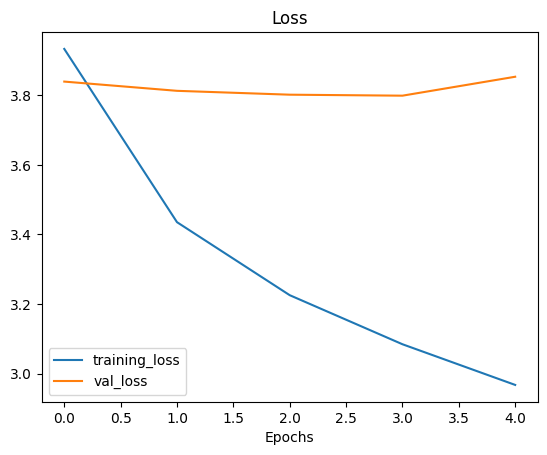

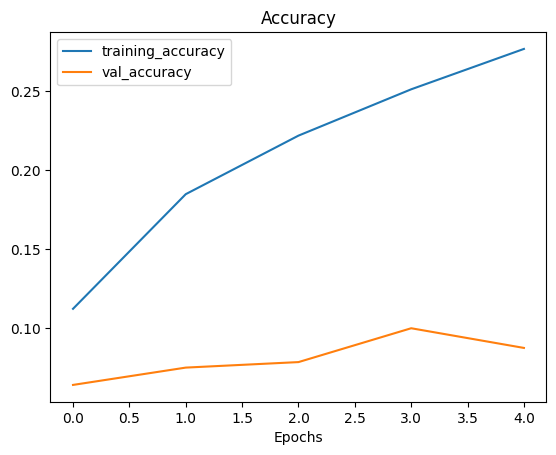

In [ ]:
plot_loss_curves(history_tl)

In [ ]:
base_model.trainable = True
for layer in base_model.layers[:-10]:
  layer.trainable=False

In [ ]:
model.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              metrics=["accuracy"])

In [ ]:
# What layers in the model are trainable?
for layer in model.layers:
  print(layer.name, layer.trainable)

input_layer True
data_augmentation True
efficientnetb0 True
global_average_pooling_2D True
output_layer True


In [ ]:
for layer_number, layer in enumerate(base_model.layers):
  print(layer_number, layer.name, layer.trainable)

0 input_1 False
1 rescaling False
2 normalization False
3 rescaling_1 False
4 stem_conv_pad False
5 stem_conv False
6 stem_bn False
7 stem_activation False
8 block1a_dwconv False
9 block1a_bn False
10 block1a_activation False
11 block1a_se_squeeze False
12 block1a_se_reshape False
13 block1a_se_reduce False
14 block1a_se_expand False
15 block1a_se_excite False
16 block1a_project_conv False
17 block1a_project_bn False
18 block2a_expand_conv False
19 block2a_expand_bn False
20 block2a_expand_activation False
21 block2a_dwconv_pad False
22 block2a_dwconv False
23 block2a_bn False
24 block2a_activation False
25 block2a_se_squeeze False
26 block2a_se_reshape False
27 block2a_se_reduce False
28 block2a_se_expand False
29 block2a_se_excite False
30 block2a_project_conv False
31 block2a_project_bn False
32 block2b_expand_conv False
33 block2b_expand_bn False
34 block2b_expand_activation False
35 block2b_dwconv False
36 block2b_bn False
37 block2b_activation False
38 block2b_se_squeeze False
39

In [ ]:
fine_tune_epochs = 10
history_fine_tune = model.fit(train_dataset,
                              epochs=fine_tune_epochs,
                              validation_data=test_dataset,
                              validation_steps=int(0.25*len(test_dataset)),
                              initial_epoch=history_tl.epoch[-1])

Epoch 5/10
882/882 [==============================] - 88s 81ms/step - loss: 2.6740 - accuracy: 0.3386 - val_loss: 4.0418 - val_accuracy: 0.1169
Epoch 6/10
882/882 [==============================] - 53s 60ms/step - loss: 2.4896 - accuracy: 0.3807 - val_loss: 3.9772 - val_accuracy: 0.1169
Epoch 7/10
882/882 [==============================] - 51s 57ms/step - loss: 2.3581 - accuracy: 0.4040 - val_loss: 3.9652 - val_accuracy: 0.0968
Epoch 8/10
882/882 [==============================] - 48s 54ms/step - loss: 2.2447 - accuracy: 0.4291 - val_loss: 4.0048 - val_accuracy: 0.1028
Epoch 9/10
882/882 [==============================] - 46s 52ms/step - loss: 2.1407 - accuracy: 0.4557 - val_loss: 3.9706 - val_accuracy: 0.1008
Epoch 10/10
882/882 [==============================] - 44s 50ms/step - loss: 2.0607 - accuracy: 0.4779 - val_loss: 4.0256 - val_accuracy: 0.1290


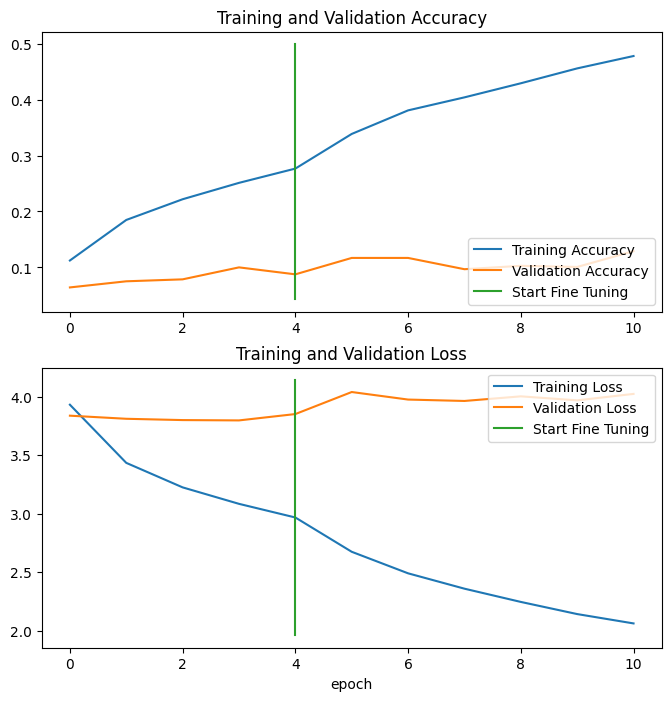

In [ ]:
compare_historys(history_tl,
                 history_fine_tune,
                 initial_epochs=5)

In [ ]:
model.evaluate(test_dataset)

126/126 [==============================] - 4s 30ms/step - loss: 3.9756 - accuracy: 0.1180


[3.975614070892334, 0.11796914041042328]

In [ ]:
base_model = tf.keras.applications.efficientnet.EfficientNetB0(include_top=False)
base_model.trainable = False

inputs = tf.keras.layers.Input(shape=(200,200,3),name="input_layer")
x = data_augmentation(inputs)
x = base_model(x, training = False)
x = tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling_2D")(x)
outputs = tf.keras.layers.Dense(94,activation = "softmax",name="output_layer")(x)
model = tf.keras.Model(inputs,outputs)

In [ ]:
base_model.trainable = True
for layer in base_model.layers[:-10]:
  layer.trainable=False

In [ ]:
model.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              metrics=["accuracy"])

In [ ]:
history_02 = model.fit(train_data,
                       epochs=5,
                       validation_data=test_data,
                       validation_steps=len(test_dataset))

Epoch 1/5
485/485 [==============================] - 52s 88ms/step - loss: 4.1700 - accuracy: 0.1135 - val_loss: 4.1679 - val_accuracy: 0.1135
Epoch 2/5
485/485 [==============================] - 35s 72ms/step - loss: 4.1417 - accuracy: 0.1141 - val_loss: 4.1650 - val_accuracy: 0.1135
Epoch 3/5
485/485 [==============================] - 34s 71ms/step - loss: 4.1375 - accuracy: 0.1141 - val_loss: 4.1604 - val_accuracy: 0.1135
Epoch 4/5
485/485 [==============================] - 33s 69ms/step - loss: 4.1363 - accuracy: 0.1141 - val_loss: 4.1615 - val_accuracy: 0.1135
Epoch 5/5
485/485 [==============================] - 50s 104ms/step - loss: 4.1351 - accuracy: 0.1141 - val_loss: 4.1657 - val_accuracy: 0.1135


In [ ]:
model.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=["accuracy"])

In [ ]:
history_03 = model.fit(train_data,
                       epochs=5,
                       validation_data=test_data,
                       validation_steps=len(test_dataset))

Epoch 1/5
485/485 [==============================] - 44s 71ms/step - loss: 4.1639 - accuracy: 0.1141 - val_loss: 4.1835 - val_accuracy: 0.1135
Epoch 2/5
485/485 [==============================] - 33s 69ms/step - loss: 4.1386 - accuracy: 0.1141 - val_loss: 4.1680 - val_accuracy: 0.1135
Epoch 3/5
485/485 [==============================] - 34s 70ms/step - loss: 4.1379 - accuracy: 0.1141 - val_loss: 4.1685 - val_accuracy: 0.1135
Epoch 4/5
485/485 [==============================] - 38s 78ms/step - loss: 4.1328 - accuracy: 0.1141 - val_loss: 4.1743 - val_accuracy: 0.1135
Epoch 5/5
485/485 [==============================] - 33s 69ms/step - loss: 4.1330 - accuracy: 0.1141 - val_loss: 4.1649 - val_accuracy: 0.1135


In [ ]:
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(200, 200),
                                               batch_size=32,
                                               class_mode='categorical')

test_data = train_datagen.flow_from_directory(test_dir,
                                              target_size=(200, 200),
                                              batch_size=32,
                                              class_mode='categorical')

Found 7746 images belonging to 94 classes.
Found 2009 images belonging to 94 classes.


In [ ]:
# Create a model
model_3 = Sequential([
    Conv2D(64,5,activation="relu",input_shape=(200,200,3)),
    Conv2D(64,5,activation="relu"),
    MaxPool2D(),
    Conv2D(64,5,activation="relu"),
    Conv2D(64,5,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(94,activation = "softmax")
])

# Compile the model
model_3.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_3 = model_3.fit(train_data,
            epochs=5,
            steps_per_epoch=len(train_data),
            validation_data=test_data,
            validation_steps=int(0.15*len(test_data)))


Epoch 1/5
243/243 [==============================] - 61s 178ms/step - loss: 4.1535 - accuracy: 0.1122 - val_loss: 4.0277 - val_accuracy: 0.1215
Epoch 2/5
243/243 [==============================] - 37s 151ms/step - loss: 3.8371 - accuracy: 0.1352 - val_loss: 3.7709 - val_accuracy: 0.1215
Epoch 3/5
243/243 [==============================] - 37s 151ms/step - loss: 3.2949 - accuracy: 0.1930 - val_loss: 3.5433 - val_accuracy: 0.1736
Epoch 4/5
243/243 [==============================] - 37s 150ms/step - loss: 2.5315 - accuracy: 0.3318 - val_loss: 4.0855 - val_accuracy: 0.1250
Epoch 5/5
243/243 [==============================] - 37s 152ms/step - loss: 1.6008 - accuracy: 0.5684 - val_loss: 4.9825 - val_accuracy: 0.1354


In [ ]:
from google.colab import files
files.download('aug')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
model_3.evaluate(test_data)

63/63 [==============================] - 8s 123ms/step - loss: 4.9969 - accuracy: 0.1533


[4.99686336517334, 0.15331010520458221]